In [2]:
import pandas as pd
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings(action='ignore')
import pickle

In [7]:
import matplotlib.pyplot as plt
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rcParams["font.family"] = 'AppleGothic'

elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rcParams["font.family"] = font_name
elif platform.system() == 'Linux':
    plt.rcParams['font.family'] = 'NanumGothic'


plt.rcParams['axes.unicode_minus'] = False

In [3]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns', 500)

## Data Load

In [4]:
train_df = pd.read_csv('./train.csv')

## Data Analysis

In [5]:
train_df

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,X_16,X_17,X_18,X_19,X_20,X_21,X_22,X_23,X_24,X_25,X_26,X_27,X_28,X_29,X_30,X_31,X_32,X_33,X_34,X_35,X_36,X_37,X_38,X_39,X_40,X_41,X_42,X_43,X_44,X_45,X_46,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56,X_57,X_58,X_59,X_60,X_61,X_62,X_63,X_64,X_65,X_66,X_67,X_68,X_69,X_70,X_71,X_72,X_73,X_74,X_75,X_76,X_77,X_78,X_79,X_80,X_81,X_82,X_83,X_84,X_85,X_86,X_87,X_88,X_89,X_90,X_91,X_92,X_93,X_94,X_95,X_96,X_97,X_98,X_99,X_100,X_101,X_102,X_103,X_104,X_105,X_106,X_107,X_108,X_109,X_110,X_111,X_112,X_113,X_114,X_115,X_116,X_117,X_118,X_119,X_120,X_121,X_122,X_123,X_124,X_125,X_126,X_127,X_128,X_129,X_130,X_131,X_132,X_133,X_134,X_135,X_136,X_137,X_138,X_139,X_140,X_141,X_142,X_143,X_144,X_145,X_146,X_147,X_148,X_149,X_150,X_151,X_152,X_153,X_154,X_155,X_156,X_157,X_158,X_159,X_160,X_161,X_162,X_163,X_164,X_165,X_166,X_167,X_168,X_169,X_170,X_171,X_172,X_173,X_174,X_175,X_176,X_177,X_178,X_179,X_180,X_181,X_182,X_183,X_184,X_185,X_186,X_187,X_188,X_189,X_190,X_191,X_192,X_193,X_194,X_195,X_196,X_197,X_198,X_199,X_200,X_201,X_202,X_203,X_204,X_205,X_206,X_207,X_208,X_209,X_210,X_211,X_212,X_213,X_214,X_215,X_216,X_217,X_218,X_219,X_220,X_221,X_222,X_223,X_224,X_225,X_226,X_227,X_228,X_229,X_230,X_231,X_232,X_233,X_234,X_235,X_236,X_237,X_238,X_239,X_240,X_241,X_242,X_243,X_244,...,X_2626,X_2627,X_2628,X_2629,X_2630,X_2631,X_2632,X_2633,X_2634,X_2635,X_2636,X_2637,X_2638,X_2639,X_2640,X_2641,X_2642,X_2643,X_2644,X_2645,X_2646,X_2647,X_2648,X_2649,X_2650,X_2651,X_2652,X_2653,X_2654,X_2655,X_2656,X_2657,X_2658,X_2659,X_2660,X_2661,X_2662,X_2663,X_2664,X_2665,X_2666,X_2667,X_2668,X_2669,X_2670,X_2671,X_2672,X_2673,X_2674,X_2675,X_2676,X_2677,X_2678,X_2679,X_2680,X_2681,X_2682,X_2683,X_2684,X_2685,X_2686,X_2687,X_2688,X_2689,X_2690,X_2691,X_2692,X_2693,X_2694,X_2695,X_2696,X_2697,X_2698,X_2699,X_2700,X_2701,X_2702,X_2703,X_2704,X_2705,X_2706,X_2707,X_2708,X_2709,X_2710,X_2711,X_2712,X_2713,X_2714,X_2715,X_2716,X_2717,X_2718,X_2719,X_2720,X_2721,X_2722,X_2723,X_2724,X_2725,X_2726,X_2727,X_2728,X_2729,X_2730,X_2731,X_2732,X_2733,X_2734,X_2735,X_2736,X_2737,X_2738,X_2739,X_2740,X_2741,X_2742,X_2743,X_2744,X_2745,X_2746,X_2747,X_2748,X_2749,X_2750,X_2751,X_2752,X_2753,X_2754,X_2755,X_2756,X_2757,X_2758,X_2759,X_2760,X_2761,X_2762,X_2763,X_2764,X_2765,X_2766,X_2767,X_2768,X_2769,X_2770,X_2771,X_2772,X_2773,X_2774,X_2775,X_2776,X_2777,X_2778,X_2779,X_2780,X_2781,X_2782,X_2783,X_2784,X_2785,X_2786,X_2787,X_2788,X_2789,X_2790,X_2791,X_2792,X_2793,X_2794,X_2795,X_2796,X_2797,X_2798,X_2799,X_2800,X_2801,X_2802,X_2803,X_2804,X_2805,X_2806,X_2807,X_2808,X_2809,X_2810,X_2811,X_2812,X_2813,X_2814,X_2815,X_2816,X_2817,X_2818,X_2819,X_2820,X_2821,X_2822,X_2823,X_2824,X_2825,X_2826,X_2827,X_2828,X_2829,X_2830,X_2831,X_2832,X_2833,X_2834,X_2835,X_2836,X_2837,X_2838,X_2839,X_2840,X_2841,X_2842,X_2843,X_2844,X_2845,X_2846,X_2847,X_2848,X_2849,X_2850,X_2851,X_2852,X_2853,X_2854,X_2855,X_2856,X_2857,X_2858,X_2859,X_2860,X_2861,X_2862,X_2863,X_2864,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,TRAIN_000,1,0.533433,2022-06-13 5:14,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7813.0,7813.0,NaN,NaN,0.19,0.20,0.19,0.2,228.0,228.0,225.0,582.9,587.1,567.3,0.0,0.0,249.96,249.99,247.46,250.0,428.0,435.0,426.0,179.9,180.0,179.9,180.0,215.0,215.0,214.9,215.0,214.9,215.0,214.9,215.0,209.9,210.0,209.9,210.0,209.9,210.0,209.9,210.0,205.0,205.0,204.9,205.

### 각 column들의 널 값의 분포 알아보기

In [23]:
train_df.groupby('PRODUCT_CODE').count()

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,X_16,X_17,X_18,X_19,X_20,X_21,X_22,X_23,X_24,X_25,X_26,X_27,X_28,X_29,X_30,X_31,X_32,X_33,X_34,X_35,X_36,X_37,X_38,X_39,X_40,X_41,X_42,X_43,X_44,X_45,X_46,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56,X_57,X_58,X_59,X_60,X_61,X_62,X_63,X_64,X_65,X_66,X_67,X_68,X_69,X_70,X_71,X_72,X_73,X_74,X_75,X_76,X_77,X_78,X_79,X_80,X_81,X_82,X_83,X_84,X_85,X_86,X_87,X_88,X_89,X_90,X_91,X_92,X_93,X_94,X_95,X_96,X_97,X_98,X_99,X_100,X_101,X_102,X_103,X_104,X_105,X_106,X_107,X_108,X_109,X_110,X_111,X_112,X_113,X_114,X_115,X_116,X_117,X_118,X_119,X_120,X_121,X_122,X_123,X_124,X_125,X_126,X_127,X_128,X_129,X_130,X_131,X_132,X_133,X_134,X_135,X_136,X_137,X_138,X_139,X_140,X_141,X_142,X_143,X_144,X_145,X_146,X_147,X_148,X_149,X_150,X_151,X_152,X_153,X_154,X_155,X_156,X_157,X_158,X_159,X_160,X_161,X_162,X_163,X_164,X_165,X_166,X_167,X_168,X_169,X_170,X_171,X_172,X_173,X_174,X_175,X_176,X_177,X_178,X_179,X_180,X_181,X_182,X_183,X_184,X_185,X_186,X_187,X_188,X_189,X_190,X_191,X_192,X_193,X_194,X_195,X_196,X_197,X_198,X_199,X_200,X_201,X_202,X_203,X_204,X_205,X_206,X_207,X_208,X_209,X_210,X_211,X_212,X_213,X_214,X_215,X_216,X_217,X_218,X_219,X_220,X_221,X_222,X_223,X_224,X_225,X_226,X_227,X_228,X_229,X_230,X_231,X_232,X_233,X_234,X_235,X_236,X_237,X_238,X_239,X_240,X_241,X_242,X_243,X_244,X_245,...,X_2626,X_2627,X_2628,X_2629,X_2630,X_2631,X_2632,X_2633,X_2634,X_2635,X_2636,X_2637,X_2638,X_2639,X_2640,X_2641,X_2642,X_2643,X_2644,X_2645,X_2646,X_2647,X_2648,X_2649,X_2650,X_2651,X_2652,X_2653,X_2654,X_2655,X_2656,X_2657,X_2658,X_2659,X_2660,X_2661,X_2662,X_2663,X_2664,X_2665,X_2666,X_2667,X_2668,X_2669,X_2670,X_2671,X_2672,X_2673,X_2674,X_2675,X_2676,X_2677,X_2678,X_2679,X_2680,X_2681,X_2682,X_2683,X_2684,X_2685,X_2686,X_2687,X_2688,X_2689,X_2690,X_2691,X_2692,X_2693,X_2694,X_2695,X_2696,X_2697,X_2698,X_2699,X_2700,X_2701,X_2702,X_2703,X_2704,X_2705,X_2706,X_2707,X_2708,X_2709,X_2710,X_2711,X_2712,X_2713,X_2714,X_2715,X_2716,X_2717,X_2718,X_2719,X_2720,X_2721,X_2722,X_2723,X_2724,X_2725,X_2726,X_2727,X_2728,X_2729,X_2730,X_2731,X_2732,X_2733,X_2734,X_2735,X_2736,X_2737,X_2738,X_2739,X_2740,X_2741,X_2742,X_2743,X_2744,X_2745,X_2746,X_2747,X_2748,X_2749,X_2750,X_2751,X_2752,X_2753,X_2754,X_2755,X_2756,X_2757,X_2758,X_2759,X_2760,X_2761,X_2762,X_2763,X_2764,X_2765,X_2766,X_2767,X_2768,X_2769,X_2770,X_2771,X_2772,X_2773,X_2774,X_2775,X_2776,X_2777,X_2778,X_2779,X_2780,X_2781,X_2782,X_2783,X_2784,X_2785,X_2786,X_2787,X_2788,X_2789,X_2790,X_2791,X_2792,X_2793,X_2794,X_2795,X_2796,X_2797,X_2798,X_2799,X_2800,X_2801,X_2802,X_2803,X_2804,X_2805,X_2806,X_2807,X_2808,X_2809,X_2810,X_2811,X_2812,X_2813,X_2814,X_2815,X_2816,X_2817,X_2818,X_2819,X_2820,X_2821,X_2822,X_2823,X_2824,X_2825,X_2826,X_2827,X_2828,X_2829,X_2830,X_2831,X_2832,X_2833,X_2834,X_2835,X_2836,X_2837,X_2838,X_2839,X_2840,X_2841,X_2842,X_2843,X_2844,X_2845,X_2846,X_2847,X_2848,X_2849,X_2850,X_2851,X_2852,X_2853,X_2854,X_2855,X_2856,X_2857,X_2858,X_2859,X_2860,X_2861,X_2862,X_2863,X_2864,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
PRODUCT_CODE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A_31,249,249,249,249,249,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,78,78,42,42,120,120,120,120,120,120,120,120,12

위의 결과로 A제품에 쓰이는 column들과 O제품과 T제품에 쓰이는 column들이 상이함을 알 수 있다.

#### 해당 결과를 시각적으로 나타내기

null값이 아닌 개수를 세서 각 column마다 grouped bar plot

In [79]:
train_dfc = train_df.iloc[:, 6:]
product_A = train_df.iloc[:, 6:][train_df['PRODUCT_CODE']=='A_31'].count()
product_O = train_df.iloc[:, 6:][train_df['PRODUCT_CODE']=='O_31'].count()
product_T = train_df.iloc[:, 6:][train_df['PRODUCT_CODE']=='T_31'].count()

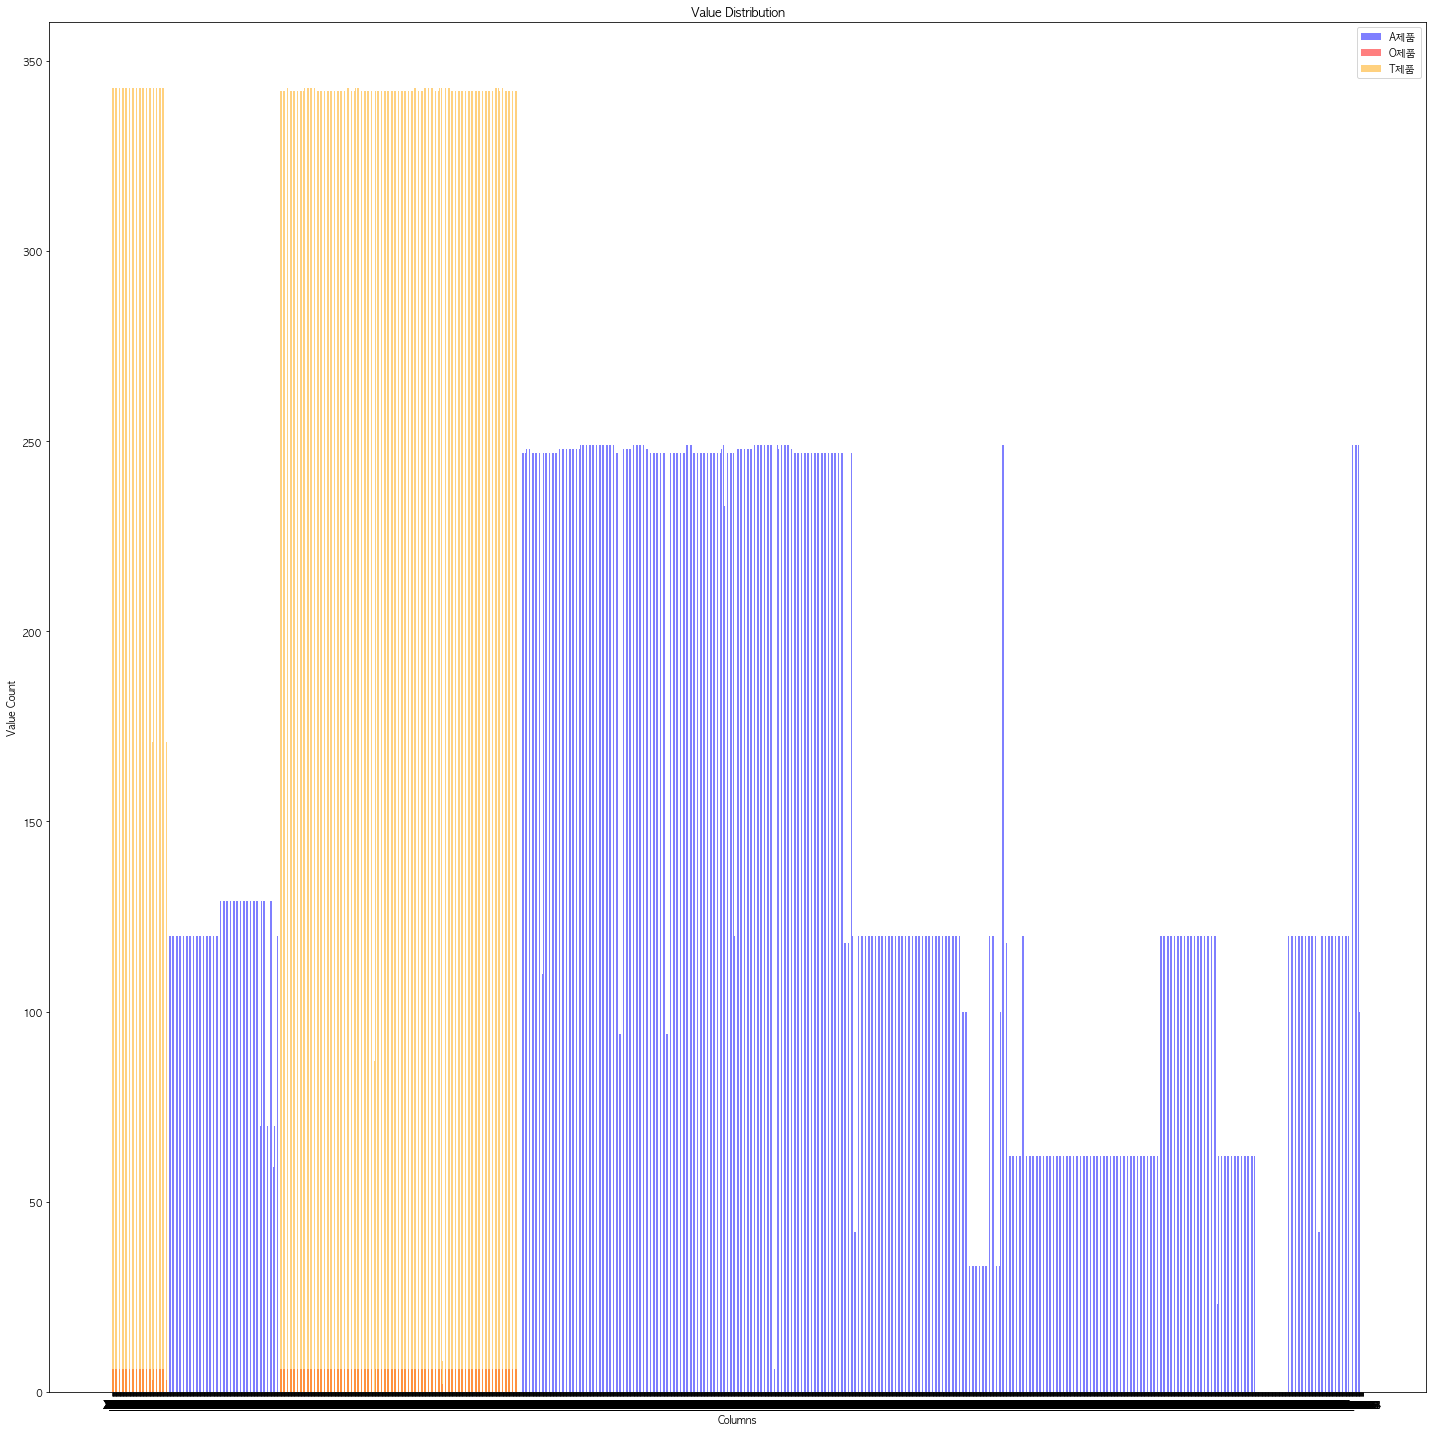

In [80]:
fig, ax = plt.subplots(figsize=(20,20))

x_indexes = np.arange(train_dfc.shape[1]) 

bar_width = 0.5
#ax.set_ylim([100,350])

ax.bar(x_indexes, 
       product_A, 
       width=bar_width, 
       color='blue', 
       alpha=0.5,
       label='A제품')

ax.bar(x_indexes, 
       product_O, 
       width=bar_width, 
       color='red', 
       alpha=0.5,
       label='O제품')

ax.bar(x_indexes, 
       product_T, 
       width=bar_width, 
       color='orange', 
       alpha=0.5,
       label='T제품')

ax.set_xticks(ticks=x_indexes, labels=train_dfc.columns)
ax.set_xlabel("Columns")
ax.set_ylabel("Value Count")
ax.set_title("Value Distribution")

ax.legend()
plt.tight_layout()

#### column의 수가 너무 많아 시각화 자료가 보기 어려우므로 100~150번째 column들만 가져와서 데이터 시각화 진행

In [64]:
train_dfc_100 = train_df.iloc[:, 100:156]
product_A100 = train_df.iloc[:, 100:156][train_df['PRODUCT_CODE']=='A_31'].count()
product_O100 = train_df.iloc[:, 100:156][train_df['PRODUCT_CODE']=='O_31'].count()
product_T100 = train_df.iloc[:, 100:156][train_df['PRODUCT_CODE']=='T_31'].count()

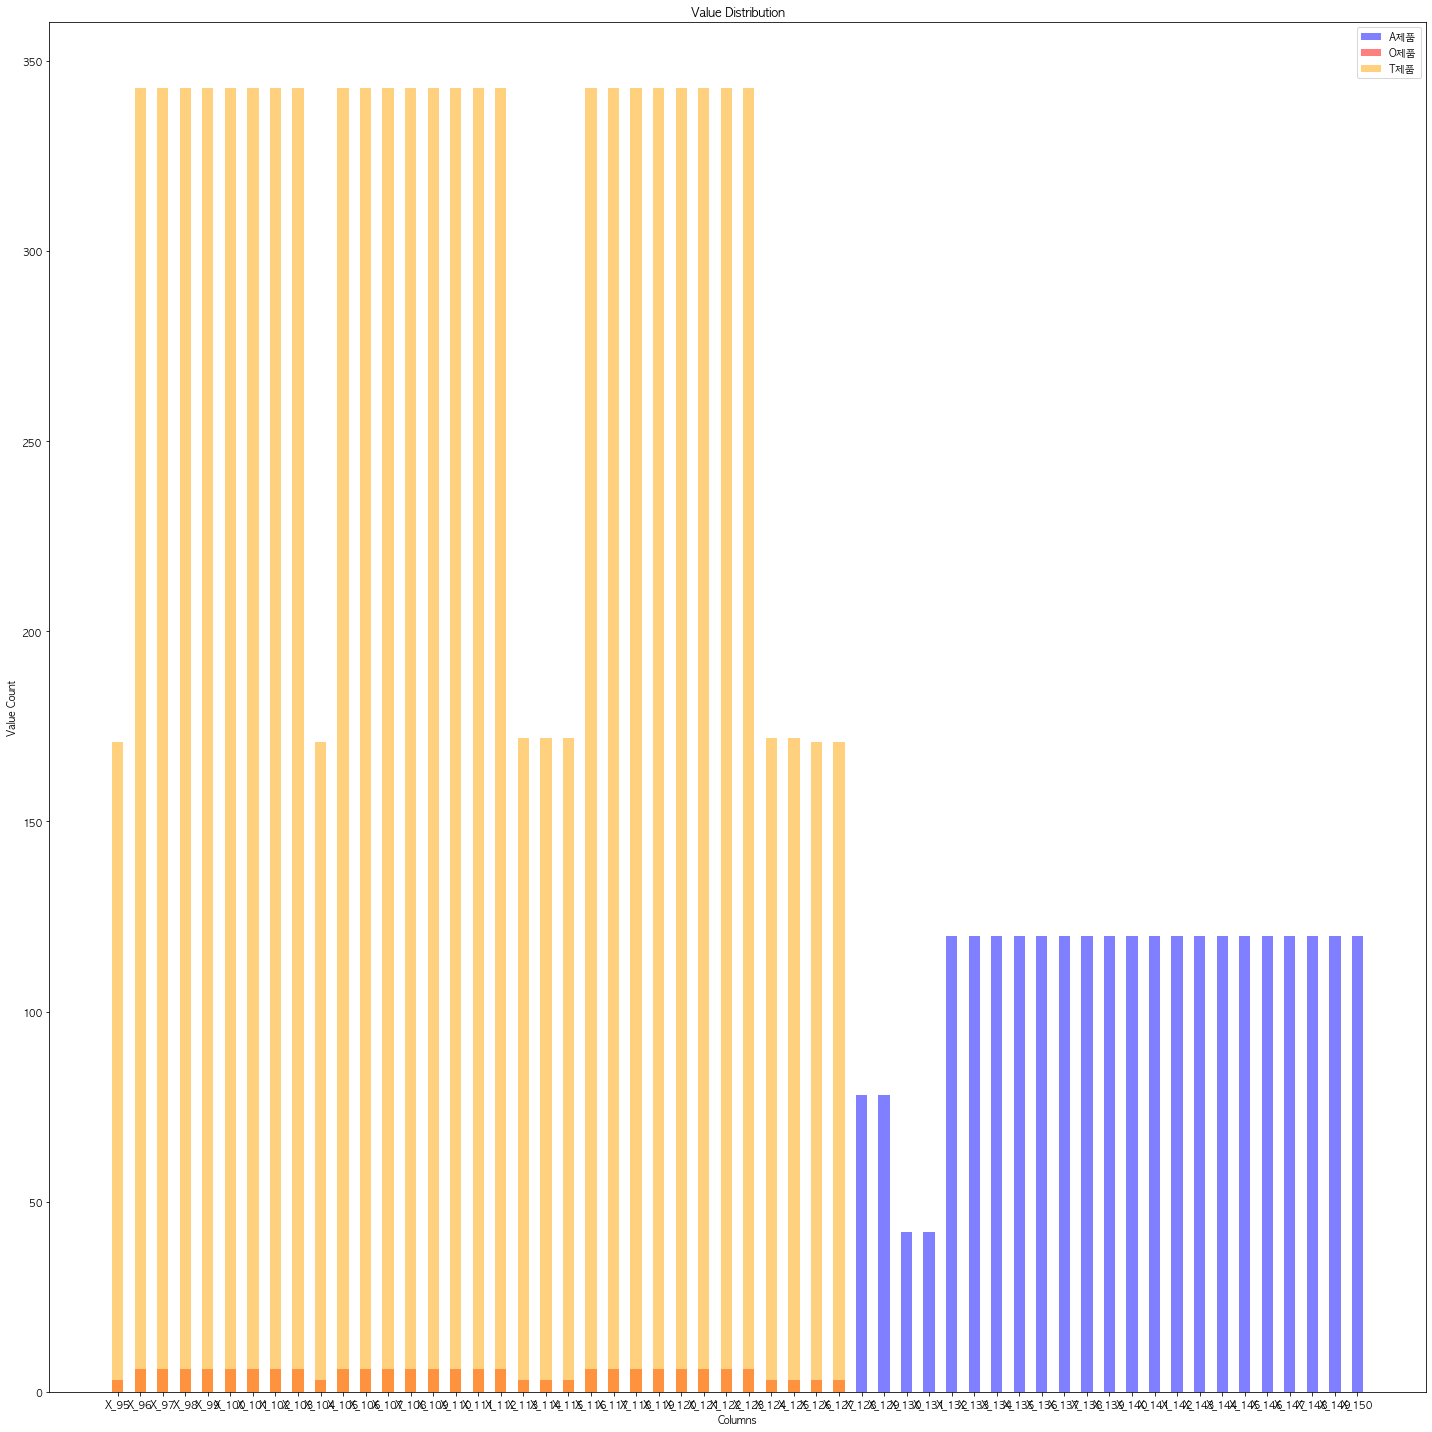

In [78]:
fig, ax = plt.subplots(figsize=(20,20))

x_indexes = np.arange(train_dfc_100.shape[1]) 

bar_width = 0.5
#ax.set_ylim([100,350])

ax.bar(x_indexes, 
       product_A100, 
       width=bar_width, 
       color='blue', 
       alpha=0.5,
       label='A제품')

ax.bar(x_indexes, 
       product_O100, 
       width=bar_width, 
       color='red', 
       alpha=0.5,
       label='O제품')

ax.bar(x_indexes, 
       product_T100, 
       width=bar_width, 
       color='orange', 
       alpha=0.5,
       label='T제품')

ax.set_xticks(ticks=x_indexes, labels=train_dfc_100.columns)
ax.set_xlabel("Columns")
ax.set_ylabel("Value Count")
ax.set_title("Value Distribution")

ax.legend()
plt.tight_layout()

-> 빨강과 주황색의 O, T제품의 값이 기록된 column들이 같은 경향을 보인다.

-> 그에 비해, A제품의 값이 기록된 column들은 O, T제품의 column들과 상이함.

#### column의 수가 너무 많아 시각화 자료를 보기 어려우므로 500~600번째 column들만 가져와서 데이터 시각화 진행

In [81]:
train_dfc_500 = train_df.iloc[:, 500:600]
product_A500 = train_df.iloc[:, 500:600][train_df['PRODUCT_CODE']=='A_31'].count()
product_O500 = train_df.iloc[:, 500:600][train_df['PRODUCT_CODE']=='O_31'].count()
product_T500 = train_df.iloc[:, 500:600][train_df['PRODUCT_CODE']=='T_31'].count()

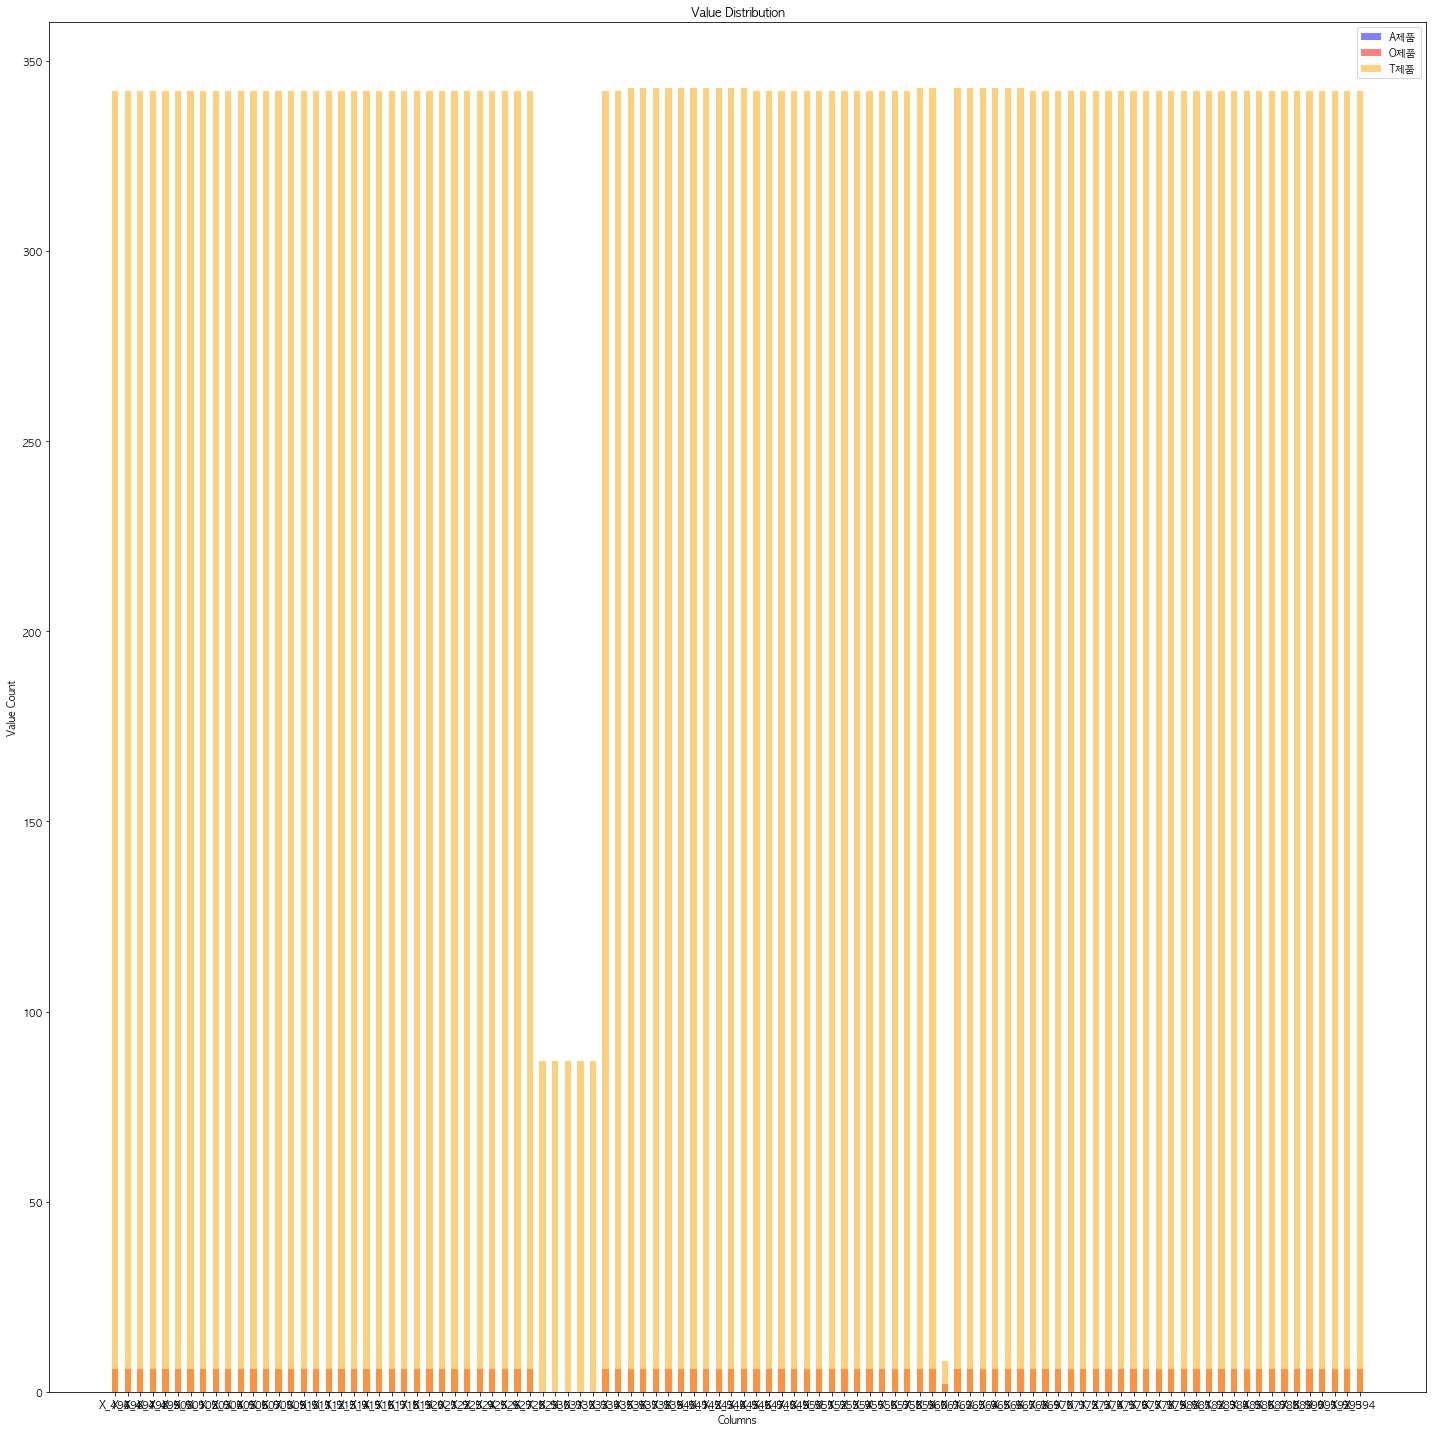

In [82]:
fig, ax = plt.subplots(figsize=(20,20))

x_indexes = np.arange(train_dfc_500.shape[1]) 

bar_width = 0.5
#ax.set_ylim([100,350])

ax.bar(x_indexes, 
       product_A500, 
       width=bar_width, 
       color='blue', 
       alpha=0.5,
       label='A제품')

ax.bar(x_indexes, 
       product_O500, 
       width=bar_width, 
       color='red', 
       alpha=0.5,
       label='O제품')

ax.bar(x_indexes, 
       product_T500, 
       width=bar_width, 
       color='orange', 
       alpha=0.5,
       label='T제품')

ax.set_xticks(ticks=x_indexes, labels=train_dfc_500.columns)
ax.set_xlabel("Columns")
ax.set_ylabel("Value Count")
ax.set_title("Value Distribution")

ax.legend()
plt.tight_layout()

-> O제품과 T제품이 기록되는 column들이 완벽히 일치하지는 않는다.

#### column의 수가 너무 많아 시각화 자료를 보기 어려우므로 2500~2875번째 column들만 가져와서 데이터 시각화 진행

In [84]:
train_dfc_2500 = train_df.iloc[:, 2500:]
product_A2500 = train_df.iloc[:, 2500:][train_df['PRODUCT_CODE']=='A_31'].count()
product_O2500 = train_df.iloc[:, 2500:][train_df['PRODUCT_CODE']=='O_31'].count()
product_T2500 = train_df.iloc[:, 2500:][train_df['PRODUCT_CODE']=='T_31'].count()

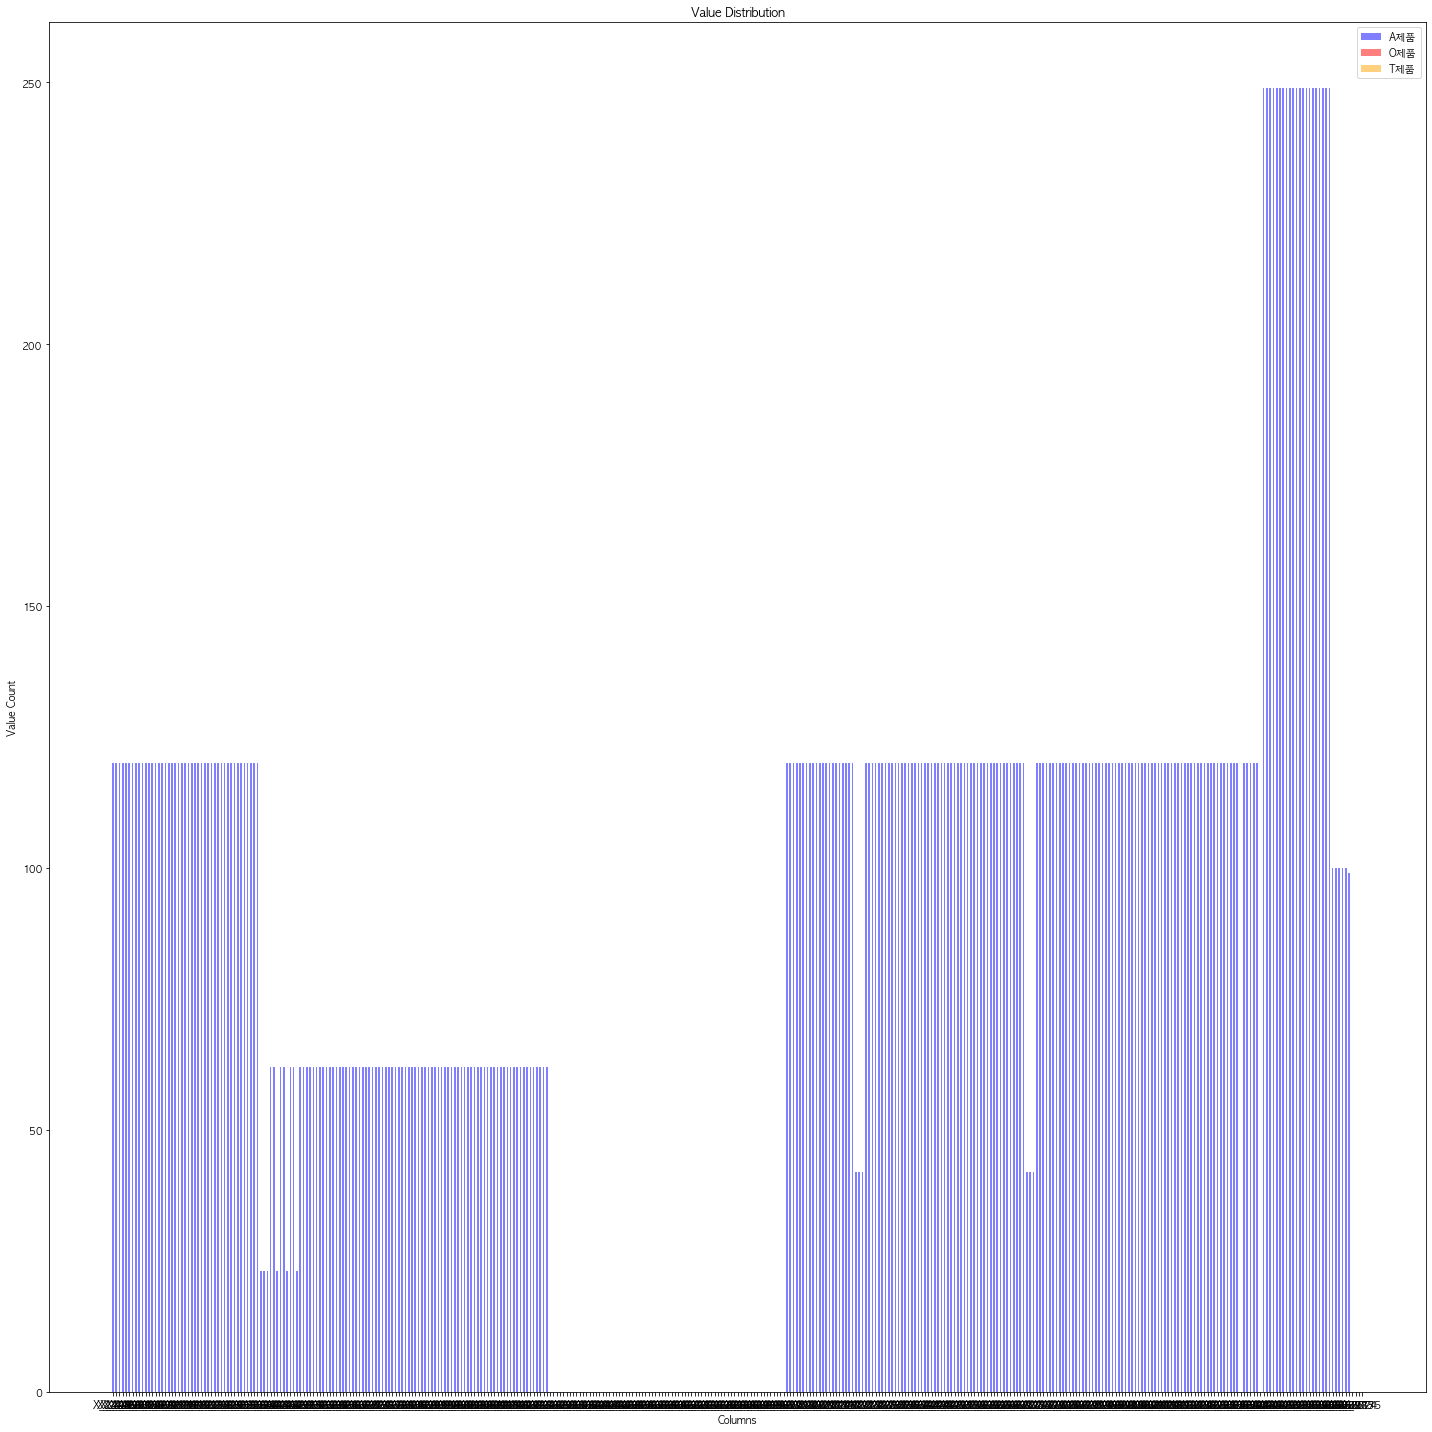

In [85]:
fig, ax = plt.subplots(figsize=(20,20))

x_indexes = np.arange(train_dfc_2500.shape[1]) 

bar_width = 0.5
#ax.set_ylim([100,350])

ax.bar(x_indexes, 
       product_A2500, 
       width=bar_width, 
       color='blue', 
       alpha=0.5,
       label='A제품')

ax.bar(x_indexes, 
       product_O2500, 
       width=bar_width, 
       color='red', 
       alpha=0.5,
       label='O제품')

ax.bar(x_indexes, 
       product_T2500, 
       width=bar_width, 
       color='orange', 
       alpha=0.5,
       label='T제품')

ax.set_xticks(ticks=x_indexes, labels=train_dfc_2500.columns)
ax.set_xlabel("Columns")
ax.set_ylabel("Value Count")
ax.set_title("Value Distribution")

ax.legend()
plt.tight_layout()

-> 어떠한 제품도 값이 기록되지 않는 column들이 있다.